Importamos todas las librerias necesarias para aplicar el modelo de regrecion lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
#Importamos la data a una variable dt
df = pd.read_csv("1 multilinear_data.csv",delimiter=";")
df.head()

,x1,x2,y
0,0.314292,1.420316,5.804630
1,6.364104,-4.158600,8.838707
2,3.143560,-3.383713,6.355494
3,5.085707,3.985542,19.783646
4,9.075665,1.064291,20.722623


Graficamos el comportamiento de los datos

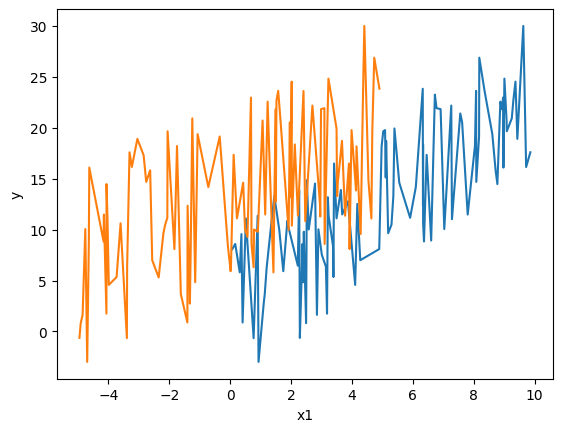

In [31]:
sns.lineplot(data = df, x ='x1', y ='y')
sns.lineplot(data = df, x ='x2', y ='y')
plt.show()

Generamos el mapa de calor, esto para analizar el comportamiento de la correlacion entre variables

In [32]:
cor = df.corr()
cor

,x1,x2,y
x1,1.000000,-0.146354,0.756342
x2,-0.146354,1.000000,0.521371
y,0.756342,0.521371,1.000000


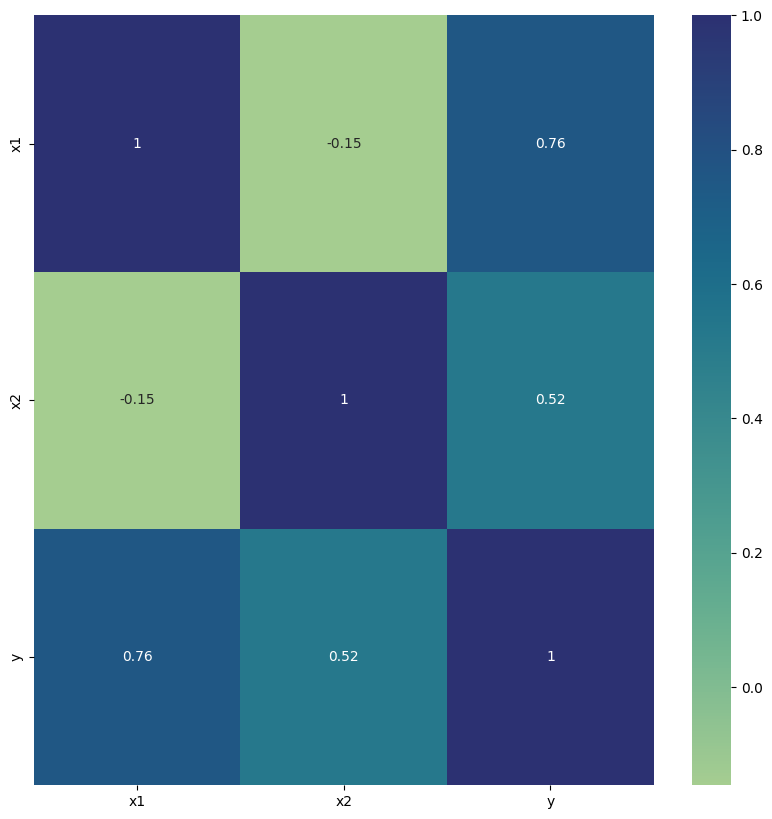

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot =True,cmap="crest")
plt.show()

Ajusta una regresión lineal simple con la característica “x” para predecir la variable objetivo “y”

In [3]:
X = df.drop(columns=['y'])    # los sensores del s1 al s21 menos el s14
y = df['y']
X.shape


(100, 2)

In [4]:
 #usamos metodo split para particionar los datos y tener un grupo de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [6]:
#generamos el modelo con los datos de entrenamiento previmaiente generados por el metodo split
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [7]:
#Analizamos los coeficientes del modelo
coeficientes =modelo.coef_
coeficientes

array([2.03580378, 1.52888808])

In [8]:
#creamos un cuadro con los coefecientes del modelo
feat =X.columns
feat
df_coef = pd.DataFrame(
    {'sensores':feat,
        'coeficientes':np.abs(coeficientes)
    }
)
df_coef.sort_values(['coeficientes'], ascending=False)

,sensores,coeficientes
0,x1,2.035804
1,x2,1.528888


Realizamos la prediccion de los datos x test con la ayuda del modelo

In [9]:
y_pred = modelo.predict(X_test)

Graficamos los datos predecidos por el modelo y los datos de testeo que deberian resultar, donde vemos que el modelo es bastante bueno

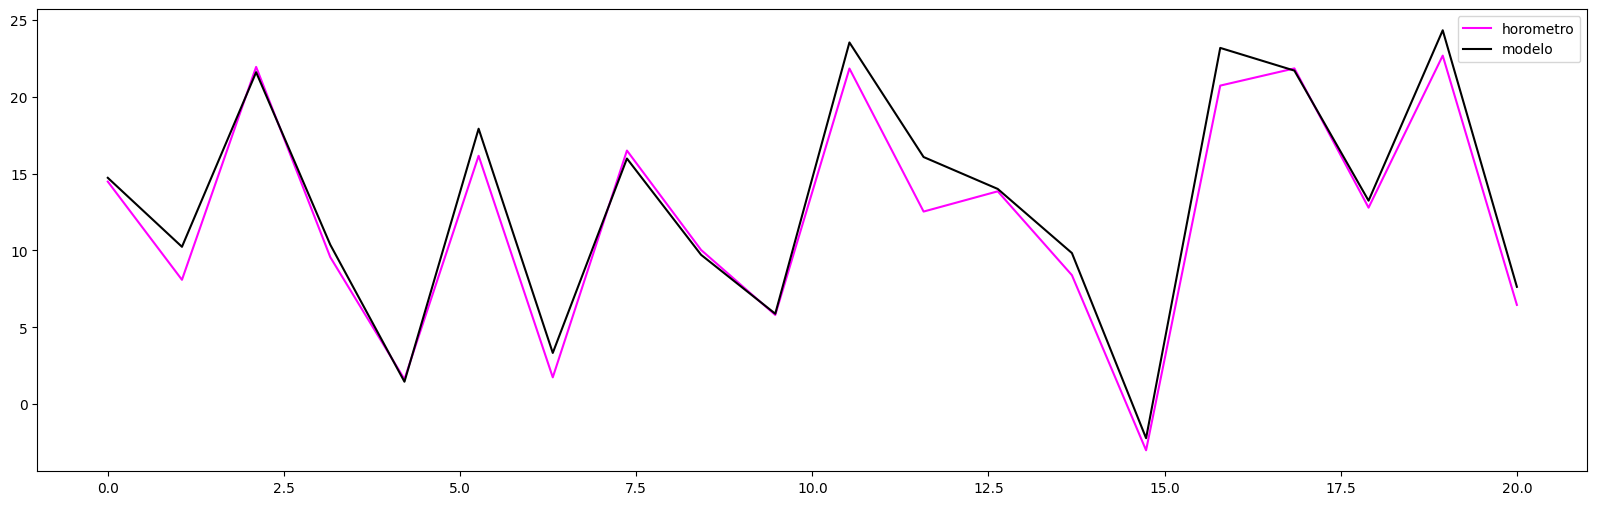

In [10]:
plt.figure(figsize=(20,6))
eje_x = np.linspace(0, len(y_test), len(y_test))

plt.plot(eje_x, y_test, label ='horometro', color ='magenta')
plt.plot(eje_x, y_pred, label ='modelo', color ='k')
plt.legend()
plt.show()

Analizamos el score del modelo

In [41]:
modelo.score(X_train,y_train)

0.9842538513186503

Evalúamos el rendimiento del modelo utilizando métricas  “R^2”, “MAE”, “MSE” 

In [45]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("El parametro r2 es:",r2)
print("El parametro mae es:",mae)
print("El parametro mse es:",mse)

El parametro r2 es: 0.9627907830159487
El parametro mae es: 1.0735362577729248
El parametro mse es: 1.9988404815319576
